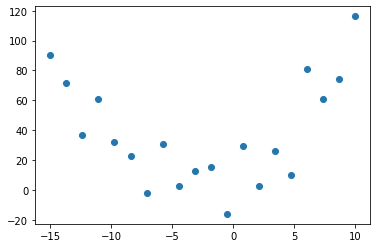

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

xin = np.linspace(-15,10,20)

def fgx(xin):
    return 0.5*xin**2 + 3*xin + 10

# Y<-fgx(X) + 10*rnorm(length(X))
mu, sigma = 0, 2
Y = fgx(xin) + 10 * np.random.normal(mu, sigma, len(xin))

#print da função
plt.scatter(xin,Y)
plt.show()



In [48]:
#Aproximacao de grau 2
# > H<-cbind(X^2,X,1)
H = pd.DataFrame({'x2': xin**2, 'x': xin, '1': 1})
print(H)

# w<-pseudoinverse(H) %*% Y
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), Y)
# w = pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index)  # ta faltando a multiplicacao por matriz aqui
print('w: ', w)


            x2          x  1
0   225.000000 -15.000000  1
1   187.257618 -13.684211  1
2   152.977839 -12.368421  1
3   122.160665 -11.052632  1
4    94.806094  -9.736842  1
5    70.914127  -8.421053  1
6    50.484765  -7.105263  1
7    33.518006  -5.789474  1
8    20.013850  -4.473684  1
9     9.972299  -3.157895  1
10    3.393352  -1.842105  1
11    0.277008  -0.526316  1
12    0.623269   0.789474  1
13    4.432133   2.105263  1
14   11.703601   3.421053  1
15   22.437673   4.736842  1
16   36.634349   6.052632  1
17   54.293629   7.368421  1
18   75.415512   8.684211  1
19  100.000000  10.000000  1
[0.59528791 3.50613482 8.60422201]


In [52]:

# > xgrid<-seq(-15,10,0.1)
# > ygrid<-(0.5*xgrid^2+3*xgrid+10)

xgrid = np.arange(-15,10,0.1)
ygrid = fgx(xgrid)
print('xgrid: ', xgrid,'ygrid: ',  ygrid)

xgrid:  [-1.50000000e+01 -1.49000000e+01 -1.48000000e+01 -1.47000000e+01
 -1.46000000e+01 -1.45000000e+01 -1.44000000e+01 -1.43000000e+01
 -1.42000000e+01 -1.41000000e+01 -1.40000000e+01 -1.39000000e+01
 -1.38000000e+01 -1.37000000e+01 -1.36000000e+01 -1.35000000e+01
 -1.34000000e+01 -1.33000000e+01 -1.32000000e+01 -1.31000000e+01
 -1.30000000e+01 -1.29000000e+01 -1.28000000e+01 -1.27000000e+01
 -1.26000000e+01 -1.25000000e+01 -1.24000000e+01 -1.23000000e+01
 -1.22000000e+01 -1.21000000e+01 -1.20000000e+01 -1.19000000e+01
 -1.18000000e+01 -1.17000000e+01 -1.16000000e+01 -1.15000000e+01
 -1.14000000e+01 -1.13000000e+01 -1.12000000e+01 -1.11000000e+01
 -1.10000000e+01 -1.09000000e+01 -1.08000000e+01 -1.07000000e+01
 -1.06000000e+01 -1.05000000e+01 -1.04000000e+01 -1.03000000e+01
 -1.02000000e+01 -1.01000000e+01 -1.00000000e+01 -9.90000000e+00
 -9.80000000e+00 -9.70000000e+00 -9.60000000e+00 -9.50000000e+00
 -9.40000000e+00 -9.30000000e+00 -9.20000000e+00 -9.10000000e+00
 -9.00000000e+00 

In [51]:
# > Hgrid<-cbind(xgrid^2,xgrid,1)

# > H<-cbind(X^2,X,1)
Hgrid = pd.DataFrame({'x2': xgrid**2, 'x': xgrid, '1': 1})
print('Hgrid: ', Hgrid)

# > yhatgrid<-Hgrid %*% w
yhatgrid = np.dot(Hgrid, w)
print('yhatgrid: ', yhatgrid)


         x2     x  1
0    225.00 -15.0  1
1    222.01 -14.9  1
2    219.04 -14.8  1
3    216.09 -14.7  1
4    213.16 -14.6  1
..      ...   ... ..
245   90.25   9.5  1
246   92.16   9.6  1
247   94.09   9.7  1
248   96.04   9.8  1
249   98.01   9.9  1

[250 rows x 3 columns]
yhatgrid:  [ 89.9519801   88.52268272  87.1052911   85.69980524  84.30622514
  82.92455079  81.55478221  80.19691938  78.85096231  77.516911
  76.19476544  74.88452565  73.58619161  72.29976333  71.02524081
  69.76262405  68.51191305  67.2731078   66.04620831  64.83121459
  63.62812662  62.4369444   61.25766795  60.09029725  58.93483232
  57.79127314  56.65961971  55.53987205  54.43203015  53.336094
  52.25206361  51.17993898  50.11972011  49.071407    48.03499964
  47.01049805  45.99790221  44.99721213  44.00842781  43.03154924
  42.06657644  41.11350939  40.1723481   39.24309257  38.3257428
  37.42029878  36.52676053  35.64512803  34.77540129  33.91758031
  33.07166509  32.23765562  31.41555192  30.60535397  29.8

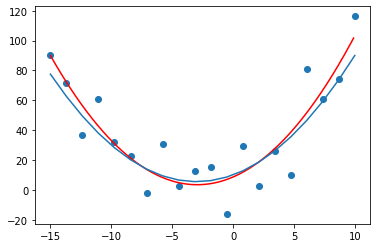

In [60]:
#print da função
plt.scatter(xin,Y) # dados gerados
plt.plot(xgrid, yhatgrid, 'r') # função aproximada
plt.plot(xin,fgx(xin)) #função geradora
plt.show()